In [10]:
import numpy as np
import mdtraj as md
import pickle
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline
import mdtraj as md
import seaborn as sns
import matplotlib.gridspec as gridspec



In [4]:
data_dir = 'Data/Chodera_data/Processed/'

In [19]:
entropy = np.load(join(data_dir, 'shannon_entropy_traj_lag1.0ps.npy'))
fast_modes = np.load(join(data_dir, 'fast_modes_lag1.0ps.npy'))
hmm_traj = np.load(join(data_dir, 'probabilistic_traj_lag1.0ps.npy'))
free_energy_traj = np.load(join(data_dir, 'free_energy_traj_lag1.0ps.npy'))
time = np.arange(hmm_traj.shape[0])

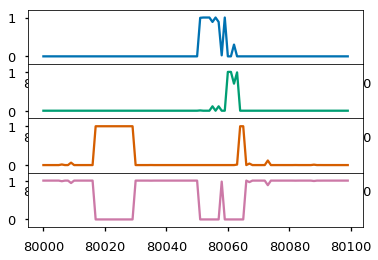

In [27]:

n_sets = 4
state_colours  = sns.color_palette('colorblind', n_sets)
start, end, stride = 80000, 80100, 1

with sns.plotting_context('talk', font_scale=1):
    
    # HMM Trajectories
    gs1 = gridspec.GridSpec(n_sets, 1, hspace=0)
    for state in range(n_sets):
        ax = plt.subplot(gs1[state, :])
        ax.plot(time[start:end:stride], hmm_traj[start:end:stride, state], color=state_colours[state])
        ax.set_ylim((-0.2, 1.2))